In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**DESCRIPTION OF DATA**

**id**: Unique ID of the loan application.

grade: LC assigned loan grade.

annual_inc: The self-reported annual income provided by the borrower during registration.

short_emp: 1 when employed for 1 year or less.

emp_length_num: Employment length in years. Possible values are - between 0 and 10 where 0 means less than one year and 10 means ten or more years.

home_ownership: Type of home ownership.

dti (Debt-To-Income Ratio): A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

purpose: A category provided by the borrower for the loan request.

term: The number of payments on the loan. Values are in months and can be either 36 or 60.

last_delinq_none: 1 when the borrower had at least one event of delinquency.

last_major_derog_none: 1 borrower had at least 90 days of a bad rating.

revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

total_rec_late_fee: Late fees received to date.

od_ratio: Overdraft ratio.

bad_loan: 1 when a loan was not paid.

In [ ]:
df=pd.read_csv('/content/lending_club_loan_dataset.csv')
df

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6595657,B,27000.0,0,9,RENT,18.36,debt_consolidation,36 months,1,NaN,46.5,0.0,0.821782,1
19996,1576331,B,45000.0,0,2,MORTGAGE,23.22,major_purchase,36 months,0,NaN,46.2,0.0,0.652200,0
19997,6645736,B,104000.0,0,5,MORTGAGE,13.27,debt_consolidation,36 months,1,NaN,78.5,0.0,0.482555,0
19998,6625736,A,38400.0,0,2,MORTGAGE,12.84,debt_consolidation,36 months,0,NaN,47.4,0.0,0.822980,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  float64
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

In [ ]:
df.columns

Index(['id', 'grade', 'annual_inc', 'short_emp', 'emp_length_num',
       'home_ownership', 'dti', 'purpose', 'term', 'last_delinq_none',
       'last_major_derog_none', 'revol_util', 'total_rec_late_fee', 'od_ratio',
       'bad_loan'],
      dtype='object')

In [ ]:
df.shape

(20000, 15)

In [ ]:
df.isnull().sum()

,0
id,0
grade,0
annual_inc,0
short_emp,0
emp_length_num,0
home_ownership,1491
dti,154
purpose,0
term,0
last_delinq_none,0


In [ ]:
df=df.drop(['last_major_derog_none'],axis=1) # more missing values
df

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,15.2,0.0,0.166500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6595657,B,27000.0,0,9,RENT,18.36,debt_consolidation,36 months,1,46.5,0.0,0.821782,1
19996,1576331,B,45000.0,0,2,MORTGAGE,23.22,major_purchase,36 months,0,46.2,0.0,0.652200,0
19997,6645736,B,104000.0,0,5,MORTGAGE,13.27,debt_consolidation,36 months,1,78.5,0.0,0.482555,0
19998,6625736,A,38400.0,0,2,MORTGAGE,12.84,debt_consolidation,36 months,0,47.4,0.0,0.822980,0


In [ ]:
df.shape

(20000, 14)

In [ ]:
df.isnull().sum()

,0
id,0
grade,0
annual_inc,0
short_emp,0
emp_length_num,0
home_ownership,1491
dti,154
purpose,0
term,0
last_delinq_none,0


In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

,0
id,0
grade,0
annual_inc,0
short_emp,0
emp_length_num,0
home_ownership,0
dti,0
purpose,0
term,0
last_delinq_none,0


In [ ]:
df.shape

(18371, 14)

In [ ]:
df['purpose'].value_counts()

,count
purpose,
debt_consolidation,11304
credit_card,3818
home_improvement,1007
other,942
major_purchase,351
small_business,246
medical,160
car,155
moving,115


In [ ]:
df.isnull().sum()

,0
id,0
grade,0
annual_inc,0
short_emp,0
emp_length_num,0
home_ownership,0
dti,0
purpose,0
term,0
last_delinq_none,0


In [ ]:
#debt_consolidation - max person took loan and for wedding few people took loan

**converting object to int**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
df['purpose']=le.fit_transform(df['purpose']) # fit_transform for fitting and transforming the data
df

<ipython-input-18-32ff8ad7f212>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['purpose']=le.fit_transform(df['purpose']) # fit_transform for fitting and transforming the data


,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,1,36 months,1,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,1,36 months,0,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,2,60 months,1,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,6,60 months,0,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,2,36 months,0,15.2,0.0,0.166500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6595657,B,27000.0,0,9,RENT,18.36,2,36 months,1,46.5,0.0,0.821782,1
19996,1576331,B,45000.0,0,2,MORTGAGE,23.22,5,36 months,0,46.2,0.0,0.652200,0
19997,6645736,B,104000.0,0,5,MORTGAGE,13.27,2,36 months,1,78.5,0.0,0.482555,0
19998,6625736,A,38400.0,0,2,MORTGAGE,12.84,2,36 months,0,47.4,0.0,0.822980,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18371 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  18371 non-null  int64  
 1   grade               18371 non-null  object 
 2   annual_inc          18371 non-null  float64
 3   short_emp           18371 non-null  int64  
 4   emp_length_num      18371 non-null  int64  
 5   home_ownership      18371 non-null  object 
 6   dti                 18371 non-null  float64
 7   purpose             18371 non-null  int64  
 8   term                18371 non-null  object 
 9   last_delinq_none    18371 non-null  int64  
 10  revol_util          18371 non-null  float64
 11  total_rec_late_fee  18371 non-null  float64
 12  od_ratio            18371 non-null  float64
 13  bad_loan            18371 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 2.1+ MB


In [ ]:
df['purpose'].value_counts()

,count
purpose,
2,11304
1,3818
3,1007
8,942
5,351
9,246
6,160
0,155
7,115


dept_consolidation(2)     12337

credit_card(1)            4137

home_improvement(3)       1096

other(8)                  1021

major_purchase(5)          379

small_business(9)          265

medical(6)                 175

car(0)                     168

moving(7)                  123

vacation(10)               112

house(4)                   101

wedding(11)                  86


In [ ]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,9770
RENT,7002
OWN,1599


In [ ]:
df['home_ownership']=le.fit_transform(df['home_ownership'])
df

<ipython-input-22-7123880ae2aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_ownership']=le.fit_transform(df['home_ownership'])


,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,2,26.27,1,36 months,1,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,1,5.39,1,36 months,0,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,0,18.45,2,60 months,1,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,0,12.28,6,60 months,0,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,0,11.26,2,36 months,0,15.2,0.0,0.166500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6595657,B,27000.0,0,9,2,18.36,2,36 months,1,46.5,0.0,0.821782,1
19996,1576331,B,45000.0,0,2,0,23.22,5,36 months,0,46.2,0.0,0.652200,0
19997,6645736,B,104000.0,0,5,0,13.27,2,36 months,1,78.5,0.0,0.482555,0
19998,6625736,A,38400.0,0,2,0,12.84,2,36 months,0,47.4,0.0,0.822980,0


<ipython-input-23-7cdda34f295f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.countplot(x='grade', data=df,palette=palette)       # countplot used to check the counts of each grade


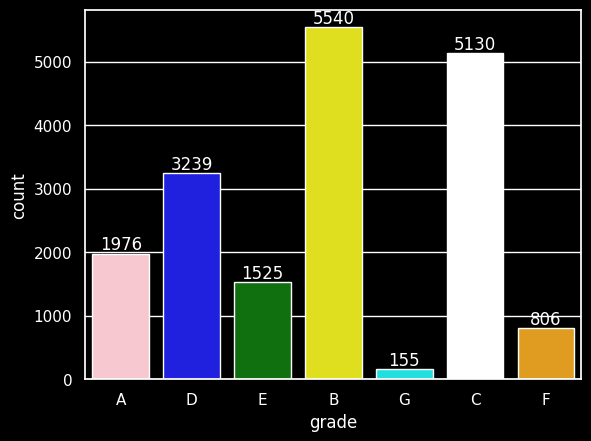

In [ ]:
sns.set()
sns.set_style("darkgrid")
plt.style.use('dark_background')
palette=['pink','blue','green','yellow','cyan','white','orange']
a=sns.countplot(x='grade', data=df,palette=palette)       # countplot used to check the counts of each grade
for ax in a.containers:
  a.bar_label(ax)

<ipython-input-24-d4028c89b4cf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.countplot(x=df['bad_loan'],data=df,palette=palette)


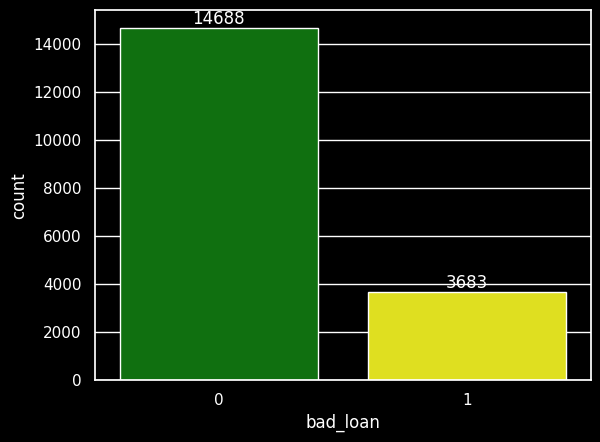

In [ ]:
palette=["green","yellow"]
a=sns.countplot(x=df['bad_loan'],data=df,palette=palette)
for ax in a.containers:  # containers and bar_label are used to display the values in the plot
  a.bar_label(ax)

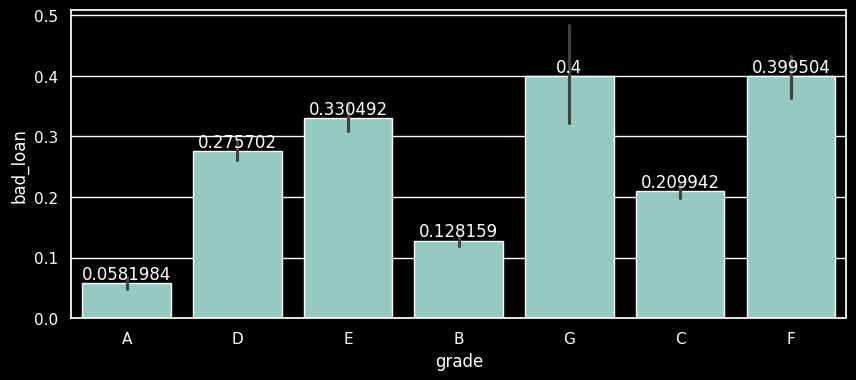

In [ ]:
#term vs loan
plt.figure(figsize=(10,4))
a=sns.barplot(x=df['grade'],y=df['bad_loan'],data=df)   # values always lies between 0 and 1
for ax in a.containers:
  a.bar_label(ax)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18371 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  18371 non-null  int64  
 1   grade               18371 non-null  object 
 2   annual_inc          18371 non-null  float64
 3   short_emp           18371 non-null  int64  
 4   emp_length_num      18371 non-null  int64  
 5   home_ownership      18371 non-null  int64  
 6   dti                 18371 non-null  float64
 7   purpose             18371 non-null  int64  
 8   term                18371 non-null  object 
 9   last_delinq_none    18371 non-null  int64  
 10  revol_util          18371 non-null  float64
 11  total_rec_late_fee  18371 non-null  float64
 12  od_ratio            18371 non-null  float64
 13  bad_loan            18371 non-null  int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 2.1+ MB


In [ ]:
df['home_ownership'].value_counts()

,count
home_ownership,
0,9770
2,7002
1,1599


MORTGAGE(0)    9844

RENT(2)        7052

OWN (1)        1613

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18371 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  18371 non-null  int64  
 1   grade               18371 non-null  object 
 2   annual_inc          18371 non-null  float64
 3   short_emp           18371 non-null  int64  
 4   emp_length_num      18371 non-null  int64  
 5   home_ownership      18371 non-null  int64  
 6   dti                 18371 non-null  float64
 7   purpose             18371 non-null  int64  
 8   term                18371 non-null  object 
 9   last_delinq_none    18371 non-null  int64  
 10  revol_util          18371 non-null  float64
 11  total_rec_late_fee  18371 non-null  float64
 12  od_ratio            18371 non-null  float64
 13  bad_loan            18371 non-null  int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 2.1+ MB


In [ ]:
df['grade'].value_counts()

,count
grade,
B,5540
C,5130
D,3239
A,1976
E,1525
F,806
G,155


In [ ]:
df['grade']=le.fit_transform(df['grade'])
df

<ipython-input-30-c4c16cb9446c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade']=le.fit_transform(df['grade'])


,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,0,100000.0,1,1,2,26.27,1,36 months,1,43.2,0.0,0.160624,0
1,9604874,0,83000.0,0,4,1,5.39,1,36 months,0,21.5,0.0,0.810777,0
2,9684700,3,78000.0,0,11,0,18.45,2,60 months,1,46.3,0.0,0.035147,1
3,9695736,3,37536.0,0,6,0,12.28,6,60 months,0,10.7,0.0,0.534887,1
4,9795013,3,65000.0,0,11,0,11.26,2,36 months,0,15.2,0.0,0.166500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6595657,1,27000.0,0,9,2,18.36,2,36 months,1,46.5,0.0,0.821782,1
19996,1576331,1,45000.0,0,2,0,23.22,5,36 months,0,46.2,0.0,0.652200,0
19997,6645736,1,104000.0,0,5,0,13.27,2,36 months,1,78.5,0.0,0.482555,0
19998,6625736,0,38400.0,0,2,0,12.84,2,36 months,0,47.4,0.0,0.822980,0


In [ ]:
df['grade'].value_counts()

,count
grade,
1,5540
2,5130
3,3239
0,1976
4,1525
5,806
6,155


B(1)    6042

C(2)    5566

D(3)    3554

A(0)    2159

E(4)    1645

F(5)     865

G(6)     169

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18371 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  18371 non-null  int64  
 1   grade               18371 non-null  int64  
 2   annual_inc          18371 non-null  float64
 3   short_emp           18371 non-null  int64  
 4   emp_length_num      18371 non-null  int64  
 5   home_ownership      18371 non-null  int64  
 6   dti                 18371 non-null  float64
 7   purpose             18371 non-null  int64  
 8   term                18371 non-null  object 
 9   last_delinq_none    18371 non-null  int64  
 10  revol_util          18371 non-null  float64
 11  total_rec_late_fee  18371 non-null  float64
 12  od_ratio            18371 non-null  float64
 13  bad_loan            18371 non-null  int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 2.1+ MB


In [ ]:
df['term'].value_counts()

,count
term,
36 months,13725
60 months,4617
36 Months,29


In [ ]:
df['term']=le.fit_transform(df['term'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18371 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  18371 non-null  int64  
 1   grade               18371 non-null  int64  
 2   annual_inc          18371 non-null  float64
 3   short_emp           18371 non-null  int64  
 4   emp_length_num      18371 non-null  int64  
 5   home_ownership      18371 non-null  int64  
 6   dti                 18371 non-null  float64
 7   purpose             18371 non-null  int64  
 8   term                18371 non-null  int64  
 9   last_delinq_none    18371 non-null  int64  
 10  revol_util          18371 non-null  float64
 11  total_rec_late_fee  18371 non-null  float64
 12  od_ratio            18371 non-null  float64
 13  bad_loan            18371 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 2.1 MB


<ipython-input-34-c35731bfb73f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['term']=le.fit_transform(df['term'])


In [ ]:
df['term'].value_counts()

,count
term,
1,13725
2,4617
0,29


36 months(1)    14969

60 months(2)     4999

36 Months(0)       32

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18371 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  18371 non-null  int64  
 1   grade               18371 non-null  int64  
 2   annual_inc          18371 non-null  float64
 3   short_emp           18371 non-null  int64  
 4   emp_length_num      18371 non-null  int64  
 5   home_ownership      18371 non-null  int64  
 6   dti                 18371 non-null  float64
 7   purpose             18371 non-null  int64  
 8   term                18371 non-null  int64  
 9   last_delinq_none    18371 non-null  int64  
 10  revol_util          18371 non-null  float64
 11  total_rec_late_fee  18371 non-null  float64
 12  od_ratio            18371 non-null  float64
 13  bad_loan            18371 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 2.1 MB


In [ ]:
df.isnull().sum()

,0
id,0
grade,0
annual_inc,0
short_emp,0
emp_length_num,0
home_ownership,0
dti,0
purpose,0
term,0
last_delinq_none,0


In [ ]:
df['dti'].mean()

16.590894344347067

In [ ]:
df.isnull().sum()

,0
id,0
grade,0
annual_inc,0
short_emp,0
emp_length_num,0
home_ownership,0
dti,0
purpose,0
term,0
last_delinq_none,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18371 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  18371 non-null  int64  
 1   grade               18371 non-null  int64  
 2   annual_inc          18371 non-null  float64
 3   short_emp           18371 non-null  int64  
 4   emp_length_num      18371 non-null  int64  
 5   home_ownership      18371 non-null  int64  
 6   dti                 18371 non-null  float64
 7   purpose             18371 non-null  int64  
 8   term                18371 non-null  int64  
 9   last_delinq_none    18371 non-null  int64  
 10  revol_util          18371 non-null  float64
 11  total_rec_late_fee  18371 non-null  float64
 12  od_ratio            18371 non-null  float64
 13  bad_loan            18371 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 2.1 MB


In [ ]:
df.isnull().sum()

,0
id,0
grade,0
annual_inc,0
short_emp,0
emp_length_num,0
home_ownership,0
dti,0
purpose,0
term,0
last_delinq_none,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18371 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  18371 non-null  int64  
 1   grade               18371 non-null  int64  
 2   annual_inc          18371 non-null  float64
 3   short_emp           18371 non-null  int64  
 4   emp_length_num      18371 non-null  int64  
 5   home_ownership      18371 non-null  int64  
 6   dti                 18371 non-null  float64
 7   purpose             18371 non-null  int64  
 8   term                18371 non-null  int64  
 9   last_delinq_none    18371 non-null  int64  
 10  revol_util          18371 non-null  float64
 11  total_rec_late_fee  18371 non-null  float64
 12  od_ratio            18371 non-null  float64
 13  bad_loan            18371 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 2.1 MB


In [ ]:
df['annual_inc']=df['annual_inc'].astype(int)
df['dti']=df['dti'].astype(int)
df['revol_util']=df['revol_util'].astype(int)
df['total_rec_late_fee']=df['total_rec_late_fee'].astype(int)



<ipython-input-43-b57f99d68300>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['annual_inc']=df['annual_inc'].astype(int)
<ipython-input-43-b57f99d68300>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dti']=df['dti'].astype(int)
<ipython-input-43-b57f99d68300>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18371 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  18371 non-null  int64  
 1   grade               18371 non-null  int64  
 2   annual_inc          18371 non-null  int64  
 3   short_emp           18371 non-null  int64  
 4   emp_length_num      18371 non-null  int64  
 5   home_ownership      18371 non-null  int64  
 6   dti                 18371 non-null  int64  
 7   purpose             18371 non-null  int64  
 8   term                18371 non-null  int64  
 9   last_delinq_none    18371 non-null  int64  
 10  revol_util          18371 non-null  int64  
 11  total_rec_late_fee  18371 non-null  int64  
 12  od_ratio            18371 non-null  float64
 13  bad_loan            18371 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 2.1 MB


In [ ]:
df['od_ratio'].value_counts()

,count
od_ratio,
0.160624,1
0.199854,1
0.791384,1
0.036392,1
0.588535,1
...,...
0.233684,1
0.071179,1
0.455098,1


In [ ]:
df['od_ratio'] = np.where(df['od_ratio'] < 0.5, 0, 1)

<ipython-input-46-390681e3090c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['od_ratio'] = np.where(df['od_ratio'] < 0.5, 0, 1)


In [ ]:
df['od_ratio'].value_counts()

,count
od_ratio,
1,9328
0,9043


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18371 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   id                  18371 non-null  int64
 1   grade               18371 non-null  int64
 2   annual_inc          18371 non-null  int64
 3   short_emp           18371 non-null  int64
 4   emp_length_num      18371 non-null  int64
 5   home_ownership      18371 non-null  int64
 6   dti                 18371 non-null  int64
 7   purpose             18371 non-null  int64
 8   term                18371 non-null  int64
 9   last_delinq_none    18371 non-null  int64
 10  revol_util          18371 non-null  int64
 11  total_rec_late_fee  18371 non-null  int64
 12  od_ratio            18371 non-null  int64
 13  bad_loan            18371 non-null  int64
dtypes: int64(14)
memory usage: 2.1 MB


<ipython-input-49-bcdae2234b1f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.countplot(x=df['od_ratio'],data=df,palette=palette) # comapred od_ratio and count


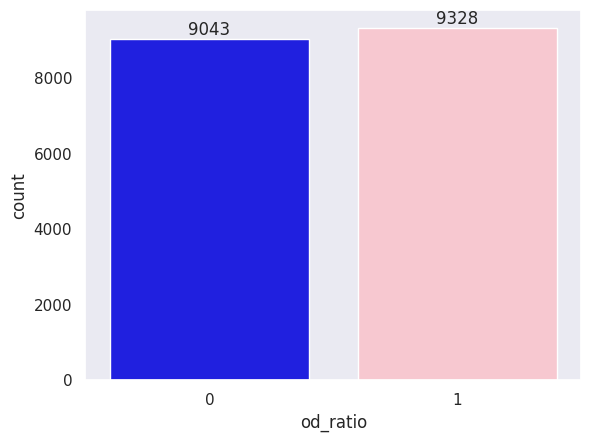

In [ ]:
palette=['blue','pink']
sns.set_style("darkgrid", {'grid.linestyle': ''})
a=sns.countplot(x=df['od_ratio'],data=df,palette=palette) # comapred od_ratio and count
for ax in a.containers:
  a.bar_label(ax)

In [ ]:
df['bad_loan'].value_counts()

,count
bad_loan,
0,14688
1,3683


In [ ]:
# Random forest model training and testing

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [ ]:
models=[DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB(),SVC()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18371 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   id                  18371 non-null  int64
 1   grade               18371 non-null  int64
 2   annual_inc          18371 non-null  int64
 3   short_emp           18371 non-null  int64
 4   emp_length_num      18371 non-null  int64
 5   home_ownership      18371 non-null  int64
 6   dti                 18371 non-null  int64
 7   purpose             18371 non-null  int64
 8   term                18371 non-null  int64
 9   last_delinq_none    18371 non-null  int64
 10  revol_util          18371 non-null  int64
 11  total_rec_late_fee  18371 non-null  int64
 12  od_ratio            18371 non-null  int64
 13  bad_loan            18371 non-null  int64
dtypes: int64(14)
memory usage: 2.1 MB


In [ ]:
df=df.drop('id',axis=1) # if the id is inavlid , then it may leads to inppropriate model results

In [ ]:
df

,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,0,100000,1,1,2,26,1,1,1,43,0,0,0
1,0,83000,0,4,1,5,1,1,0,21,0,1,0
2,3,78000,0,11,0,18,2,2,1,46,0,0,1
3,3,37536,0,6,0,12,6,2,0,10,0,1,1
4,3,65000,0,11,0,11,2,1,0,15,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,27000,0,9,2,18,2,1,1,46,0,1,1
19996,1,45000,0,2,0,23,5,1,0,46,0,1,0
19997,1,104000,0,5,0,13,2,1,1,78,0,0,0
19998,0,38400,0,2,0,12,2,1,0,47,0,1,0


<Axes: >

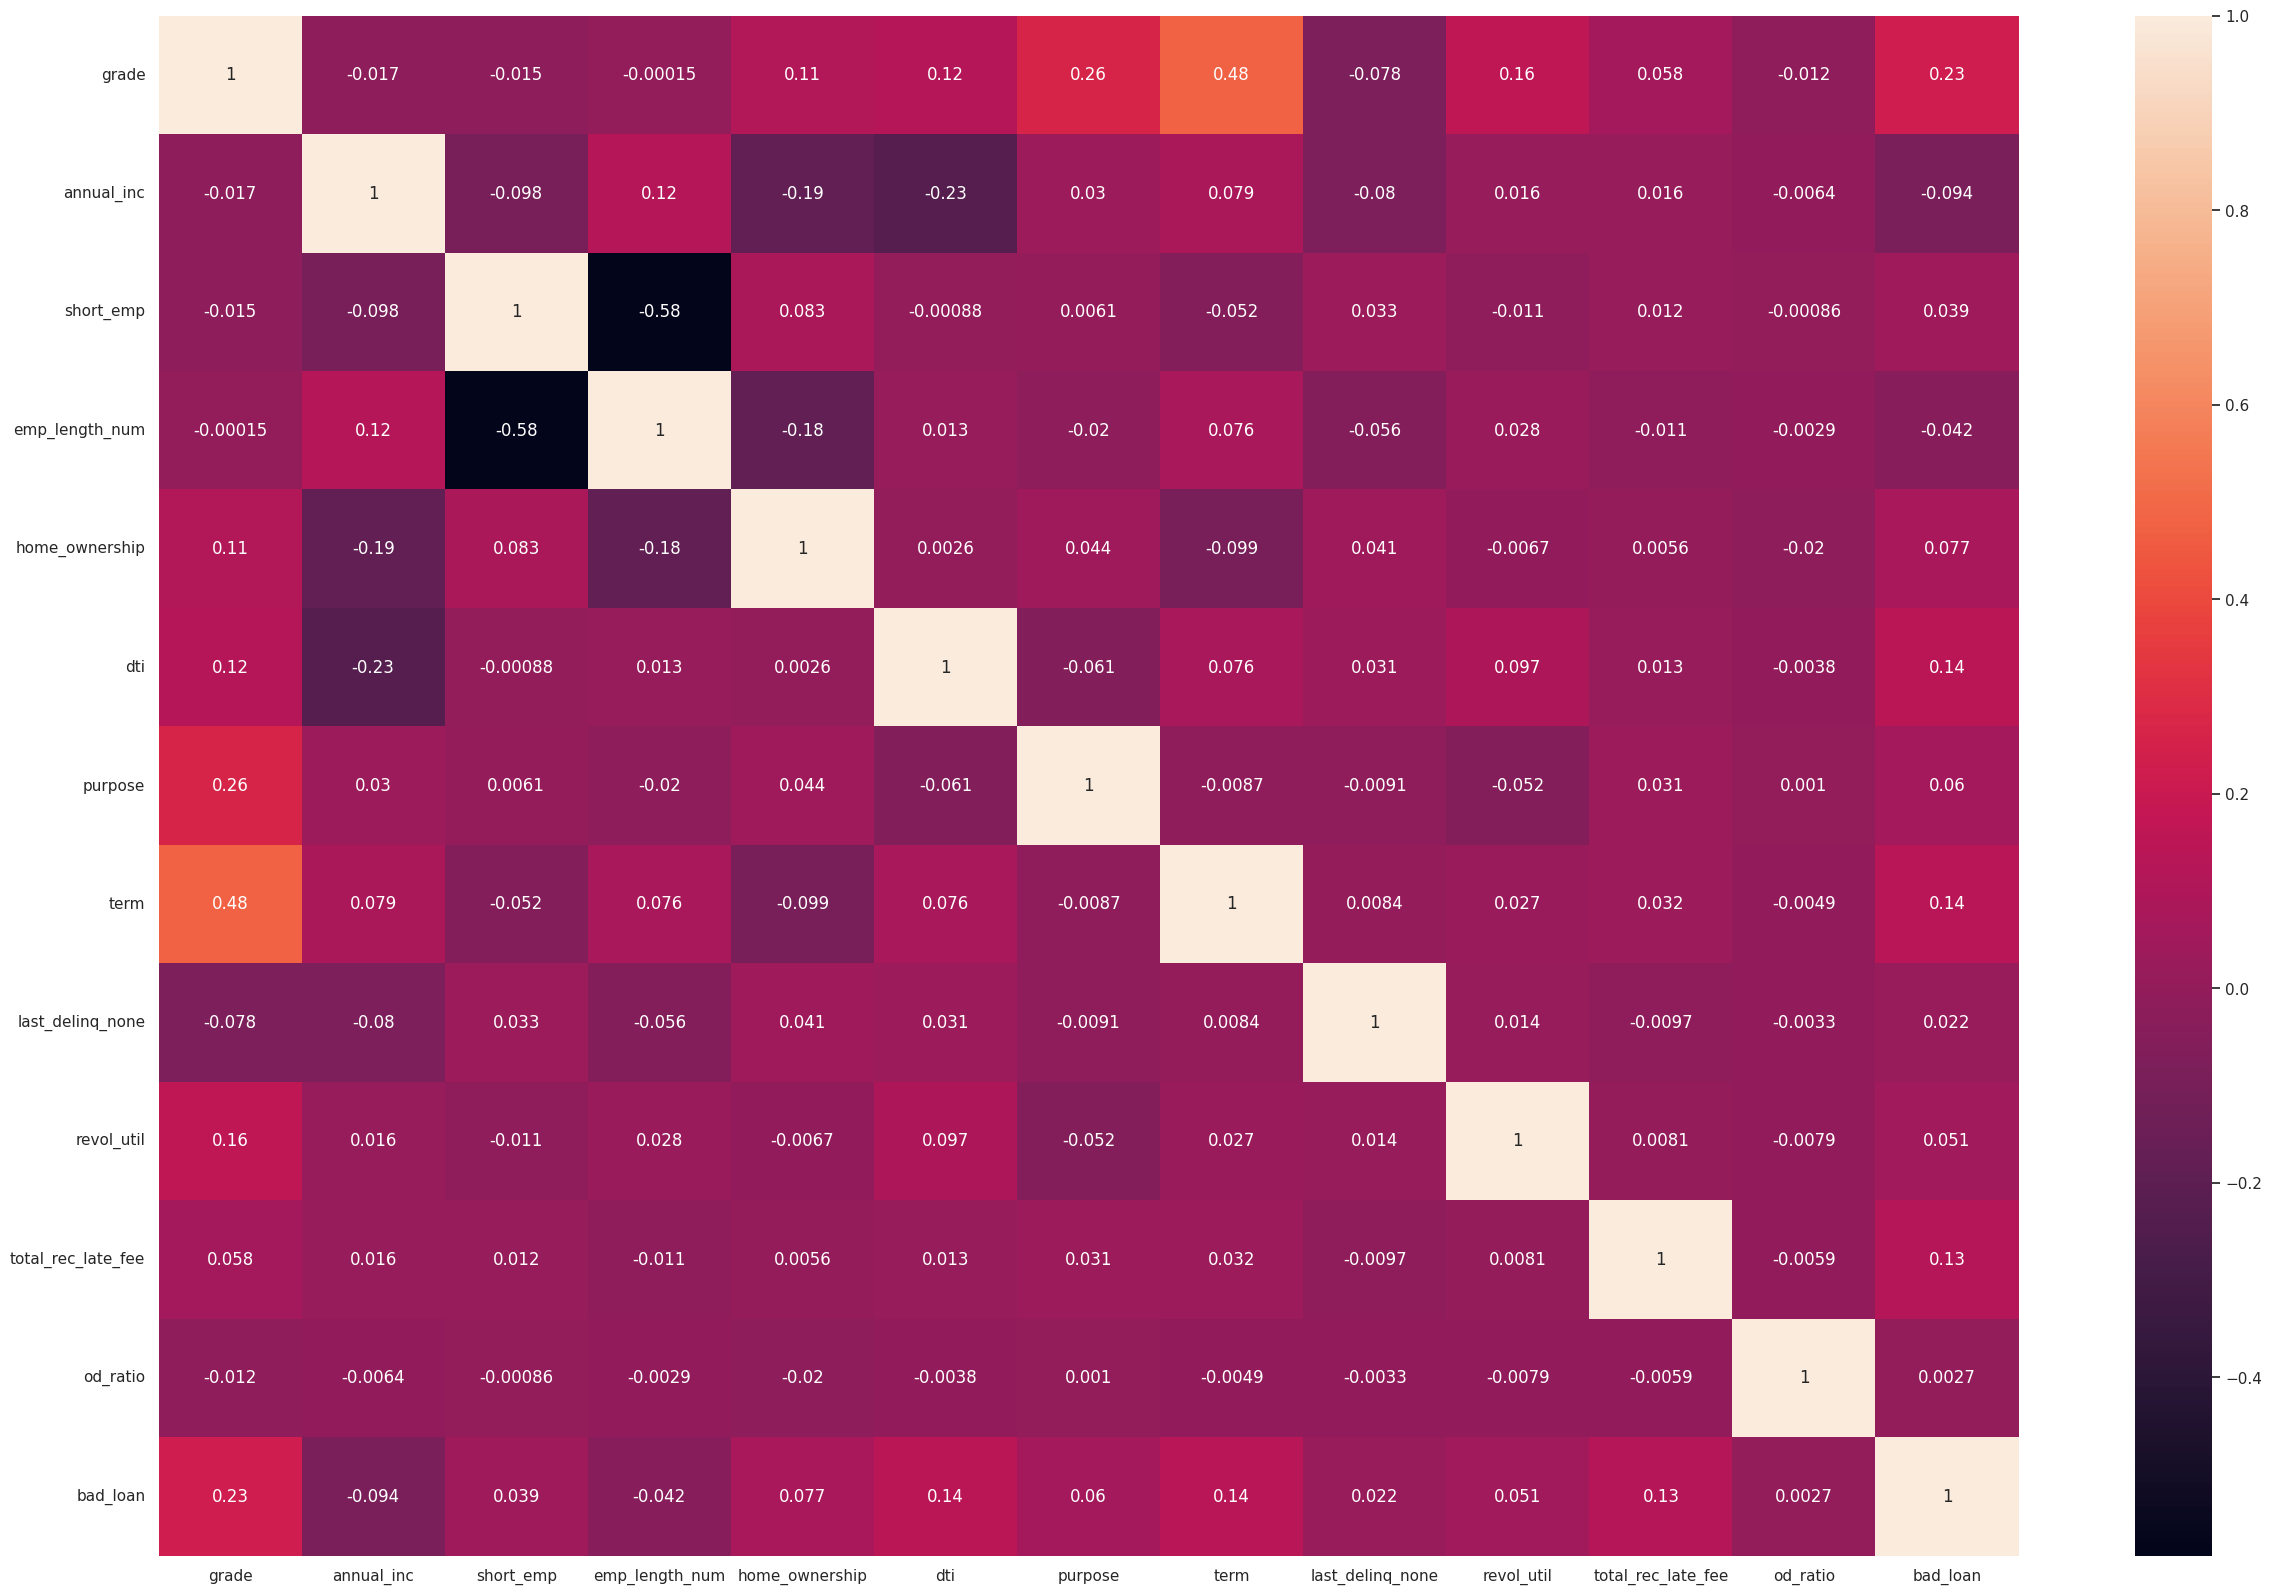

In [ ]:
plt.figure(figsize=(30,20))
a=df.corr()    # more the value , more correlation
sns.heatmap(a,annot=True)

In [ ]:
X=df.drop('bad_loan',axis=1) # independent
y=df['bad_loan'] # dependent

In [ ]:
X

,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio
0,0,100000,1,1,2,26,1,1,1,43,0,0
1,0,83000,0,4,1,5,1,1,0,21,0,1
2,3,78000,0,11,0,18,2,2,1,46,0,0
3,3,37536,0,6,0,12,6,2,0,10,0,1
4,3,65000,0,11,0,11,2,1,0,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,27000,0,9,2,18,2,1,1,46,0,1
19996,1,45000,0,2,0,23,5,1,0,46,0,1
19997,1,104000,0,5,0,13,2,1,1,78,0,0
19998,0,38400,0,2,0,12,2,1,0,47,0,1


In [ ]:
y

,bad_loan
0,0
1,0
2,1
3,1
4,0
...,...
19995,1
19996,0
19997,0
19998,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) # independent var training and testing , dependent var training and testing

In [ ]:
len(X_train)

14696

In [ ]:
len(X_test)

3675

In [ ]:
16000/18371 # verified if 80% training is done

0.8709378912416308

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
models=[DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB(),SVC()]

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
def abss():
    model_names = []
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    for model in models:
        model.fit(X_train, y_train)

        model_name = type(model).__name__
        model_names.append(model_name)

        # Calculate and store accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        # Calculate precision, recall, and F1-score
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

        print("Model name:", model_name)
        print("Model training score:", model.score(X_train, y_train))
        print("Model testing score:", model.score(X_test, y_test))
        print("Accuracy score on test set:", accuracy)

        cm = confusion_matrix(y_test, y_pred)
        print("Confusion matrix:\n", cm)

        # Plotting confusion matrix
        plt.figure(figsize=(5, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # cmap is the color palette, fmt is format as integer
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix for {model_name}')
        plt.show()

        print("Classification report:\n", classification_report(y_test, y_pred))
        print("---------------------------------------------------------------------------")

    # Create a DataFrame for plotting classification report metrics
    metrics_df = pd.DataFrame({
        'Model': model_names,
        'Accuracy': [acc * 100 for acc in accuracies],
        'Precision': [prec * 100 for prec in precisions],
        'Recall': [rec * 100 for rec in recalls],
        'F1 Score': [f1 * 100 for f1 in f1_scores]
    }).set_index('Model')

    # Plotting the classification report metrics
    ax = metrics_df.plot(kind='bar', figsize=(23, 8), colormap='viridis')
    plt.title('Comparison of Accuracy, Precision, Recall, and F1 Score')
    plt.xlabel('Model')
    plt.ylabel('Score (%)')
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.legend(title='Metrics')

    # Adding value labels on top of the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

    plt.show()


Model name: DecisionTreeClassifier
Model training score: 1.0
Model testing score: 0.7039455782312926
Accuracy score on test set: 0.7039455782312926
Confusion matrix:
 [[2377  569]
 [ 519  210]]


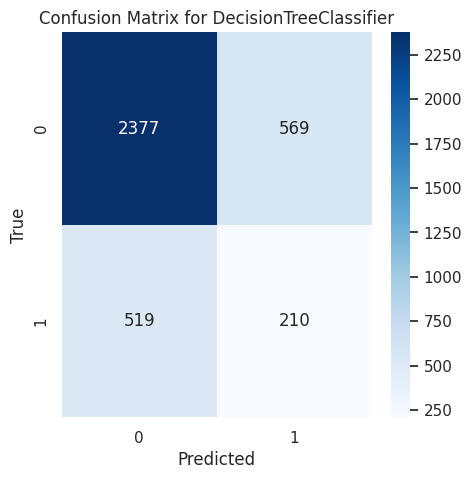

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      2946
           1       0.27      0.29      0.28       729

    accuracy                           0.70      3675
   macro avg       0.55      0.55      0.55      3675
weighted avg       0.71      0.70      0.71      3675

---------------------------------------------------------------------------
Model name: RandomForestClassifier
Model training score: 1.0
Model testing score: 0.7961904761904762
Accuracy score on test set: 0.7961904761904762
Confusion matrix:
 [[2852   94]
 [ 655   74]]


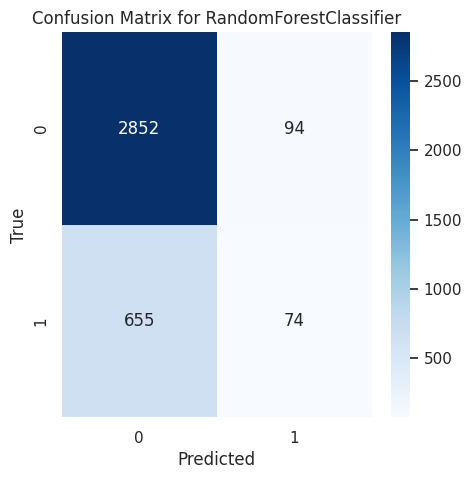

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      2946
           1       0.44      0.10      0.16       729

    accuracy                           0.80      3675
   macro avg       0.63      0.53      0.52      3675
weighted avg       0.74      0.80      0.74      3675

---------------------------------------------------------------------------
Model name: GaussianNB
Model training score: 0.8032117583015786
Model testing score: 0.8043537414965987
Accuracy score on test set: 0.8043537414965987
Confusion matrix:
 [[2928   18]
 [ 701   28]]


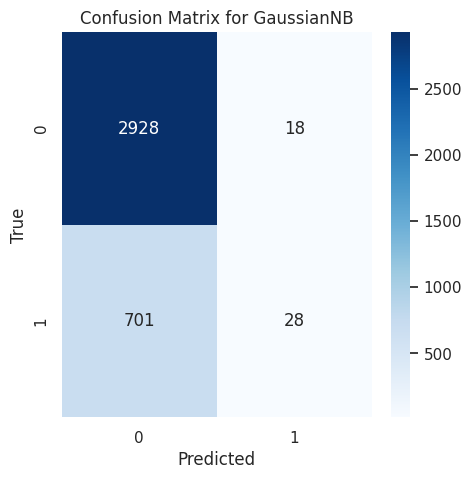

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89      2946
           1       0.61      0.04      0.07       729

    accuracy                           0.80      3675
   macro avg       0.71      0.52      0.48      3675
weighted avg       0.77      0.80      0.73      3675

---------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model name: SVC
Model training score: 0.7989929232444203
Model testing score: 0.8016326530612244
Accuracy score on test set: 0.8016326530612244
Confusion matrix:
 [[2946    0]
 [ 729    0]]


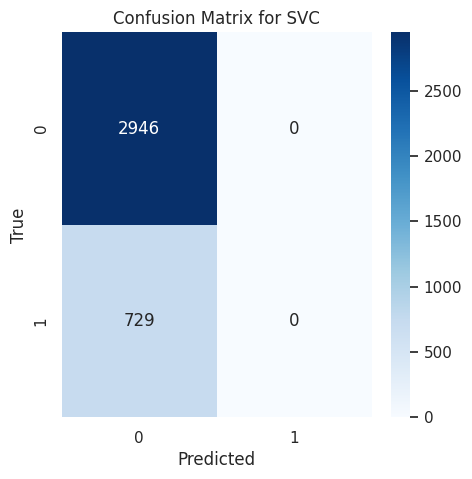

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      2946
           1       0.00      0.00      0.00       729

    accuracy                           0.80      3675
   macro avg       0.40      0.50      0.44      3675
weighted avg       0.64      0.80      0.71      3675

---------------------------------------------------------------------------


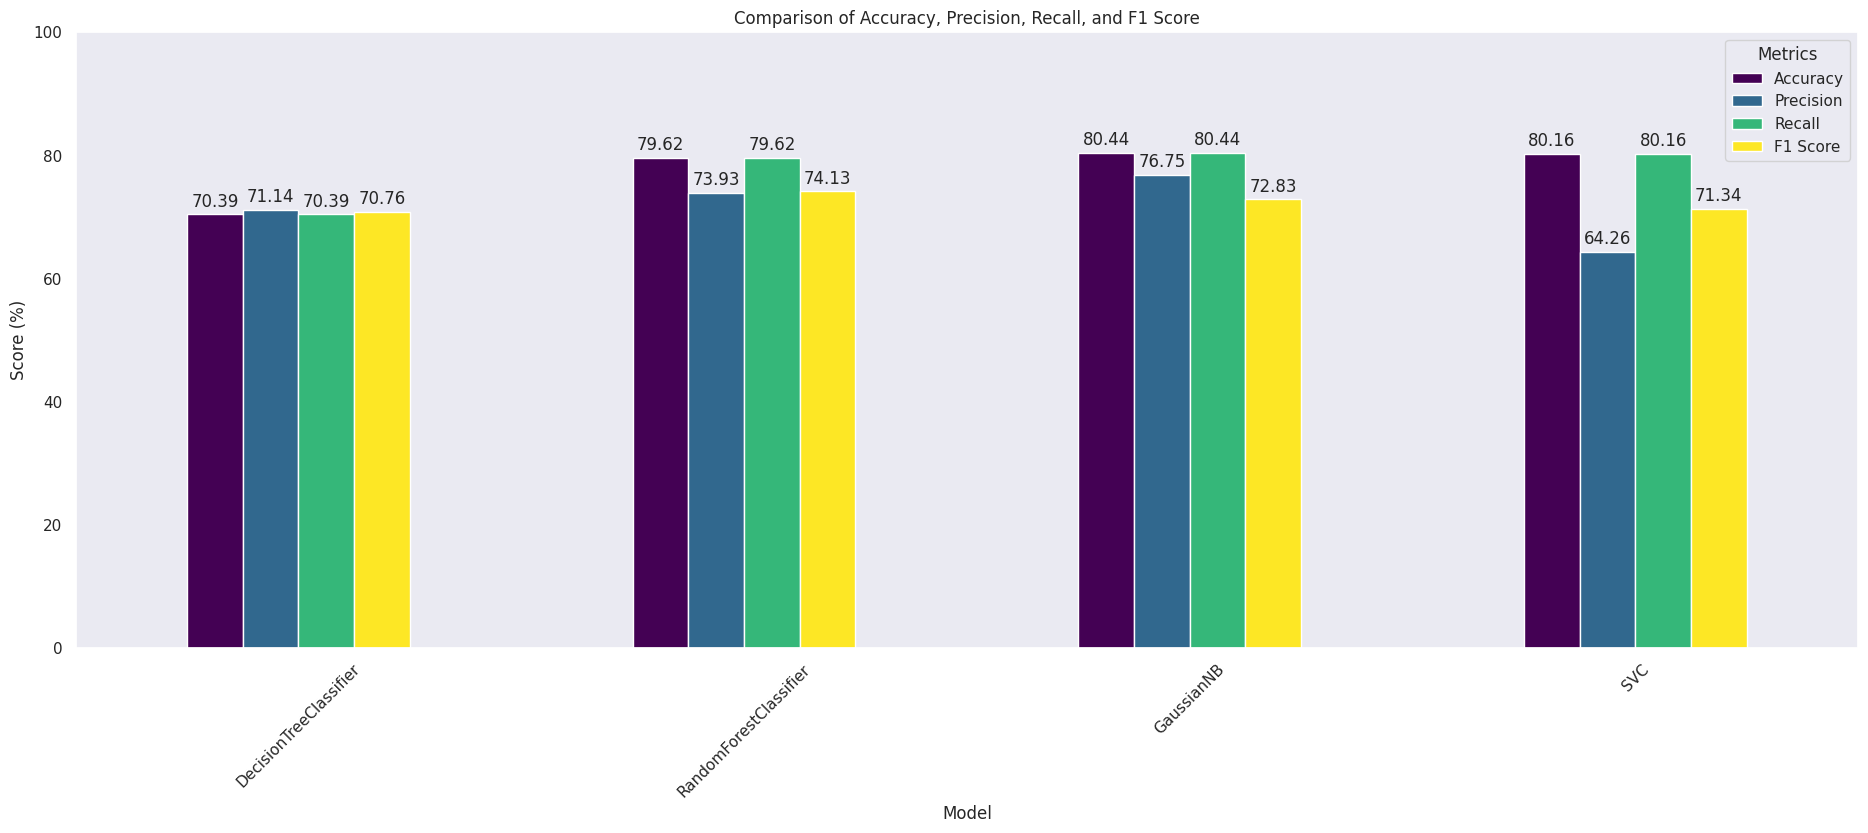

In [ ]:
abss()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18371 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   grade               18371 non-null  int64
 1   annual_inc          18371 non-null  int64
 2   short_emp           18371 non-null  int64
 3   emp_length_num      18371 non-null  int64
 4   home_ownership      18371 non-null  int64
 5   dti                 18371 non-null  int64
 6   purpose             18371 non-null  int64
 7   term                18371 non-null  int64
 8   last_delinq_none    18371 non-null  int64
 9   revol_util          18371 non-null  int64
 10  total_rec_late_fee  18371 non-null  int64
 11  od_ratio            18371 non-null  int64
 12  bad_loan            18371 non-null  int64
dtypes: int64(13)
memory usage: 2.0 MB


In [ ]:
#confusion metrics

In [ ]:
df.head()

,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,0,100000,1,1,2,26,1,1,1,43,0,0,0
1,0,83000,0,4,1,5,1,1,0,21,0,1,0
2,3,78000,0,11,0,18,2,2,1,46,0,0,1
3,3,37536,0,6,0,12,6,2,0,10,0,1,1
4,3,65000,0,11,0,11,2,1,0,15,0,0,0


In [ ]:
# Save the updated DataFrame to a CSV file
df.to_csv('updated_data.csv', index=True)

print("\nDataFrame saved to 'updated_data.csv'")



DataFrame saved to 'updated_data.csv'


FPG Vertical

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, apriori, association_rules
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Load the dataset
file_path = '/content/lending_club_loan_dataset.csv'  # Update the path to your dataset
data = pd.read_csv(file_path)

# Convert the data into a list of transactions (each row as a transaction)
transactions = data.astype(str).values.tolist()  # Ensuring all data are strings

# Use TransactionEncoder to transform the dataset into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Generate frequent itemsets using the FPGrowth algorithm
frequent_itemsets_fpg = fpgrowth(df, min_support=0.1, use_colnames=True)

# Generate frequent itemsets using the Apriori algorithm
frequent_itemsets_apriori = apriori(df, min_support=0.1, use_colnames=True)

# Merge frequent itemsets from both algorithms
merged_frequent_itemsets = pd.concat([frequent_itemsets_fpg, frequent_itemsets_apriori]).drop_duplicates()

# Generate association rules from the merged frequent itemsets
rules = association_rules(merged_frequent_itemsets, metric="confidence", min_threshold=0.7)

# Calculate accuracy as the average confidence of the rules (interpretation of rule "accuracy")
accuracy = rules['confidence'].mean() * 100 if not rules.empty else 0

print(f"Accuracy (Confidence of rules): {accuracy:.1f}%")

# Use 'bad_loan' as the actual column for true values (0 = good loan, 1 = bad loan)
actual = data['bad_loan'].astype(int)

# Dummy predicted values (these should be replaced by actual predictions in a real scenario)
predicted = [0 if i % 2 == 0 else 1 for i in range(len(actual))]  # Example dummy predictions

# Calculate precision, F1 score, and accuracy score using actual vs predicted values
accuracy_score_value = accuracy_score(actual, predicted) * 100
precision = precision_score(actual, predicted, average='weighted', zero_division=1)
f1 = f1_score(actual, predicted, average='weighted', zero_division=1)

# Output the evaluation metrics
print(f"Accuracy Score (Model): {accuracy_score_value:.1f}%")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy (Confidence of rules): 93.3%
Accuracy Score (Model): 50.1%
Precision: 0.68
F1 Score: 0.55
